In [1]:
#Bibliotheken importieren
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
import seaborn as sns

In [3]:
#Alle VGG16 Klassen importieren
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.models import Model

In [19]:
#Datenverzeichnis
data_dir= "../Data"
train_dir= "../Data/train"
test_dir= "../Data/test"

In [20]:
#Train Datenverzeichnis
train_dir = pathlib.Path(train_dir)

In [21]:
#Eine Liste mit den Namen zurückgeben
os.listdir(train_dir)

['nachtchatten', 'kamille', 'distel', 'zuckerruebe']

In [22]:
#Train Klassen paths
train_distel_dir = os.path.join(train_dir, 'distel')
train_kamille_dir = os.path.join(train_dir, 'kamille')
train_nachtchatten_dir = os.path.join(train_dir, 'nachtchatten')
train_zuckerruebe_dir = os.path.join(train_dir, 'zuckerruebe')


In [23]:
#Anzahl der Bilder in jeder Klasse
number_distel_train = len(os.listdir(train_distel_dir))
number_kamille_train = len(os.listdir(train_kamille_dir))
number_nachtchatten_train = len(os.listdir(train_nachtchatten_dir))
number_zuckerruebe_train = len(os.listdir(train_zuckerruebe_dir))


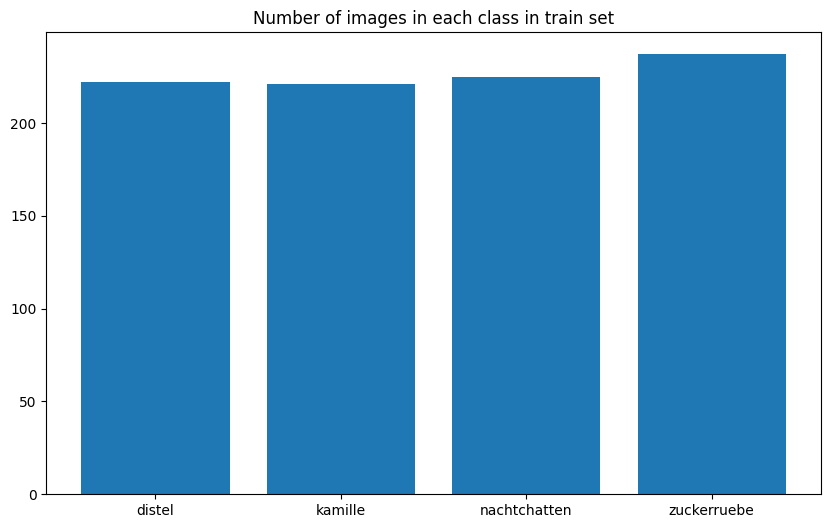

In [24]:
#Plot die Anzahl von train Bilder in jeder Klasse
x = ['distel', 'kamille', 'nachtchatten', 'zuckerruebe']
number_train_each = [number_distel_train, number_kamille_train, number_nachtchatten_train,number_zuckerruebe_train]
plt.figure(figsize=(10,6))
plt.bar(x, number_train_each) # A bar chart
plt.title('Number of images in each class in train set')
plt.show()


In [25]:
#Test class paths
test_distel_dir = os.path.join(test_dir, 'distel')
test_kamille_dir = os.path.join(test_dir, 'kamille')
test_nachtchatten_dir = os.path.join(test_dir, 'nachtchatten')
test_zuckerruebe_dir = os.path.join(test_dir, 'zuckerruebe')

In [26]:
#Anzahl der Bilder in jeder Klasse
number_distel_test = len(os.listdir(test_distel_dir))
number_kamille_test = len(os.listdir(test_kamille_dir))
number_nachtchatten_test = len(os.listdir(test_nachtchatten_dir))
number_zuckerruebe_test = len(os.listdir(test_zuckerruebe_dir))


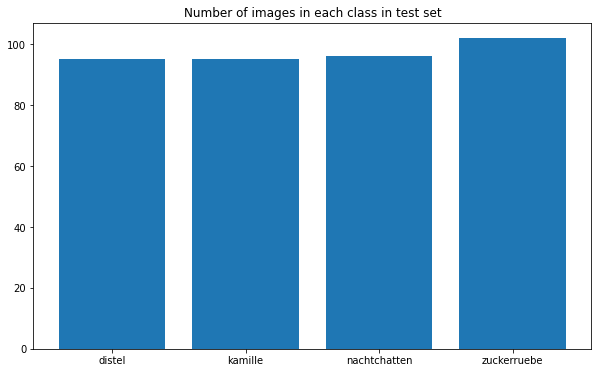

In [46]:
#Plot die Anzahl von train Bilder in jeder Klasse
x = ['distel', 'kamille', 'nachtchatten', 'zuckerruebe']
number_train_each = [number_distel_test, number_kamille_test, number_nachtchatten_test,number_zuckerruebe_test]
plt.figure(figsize=(10,6))
plt.bar(x, number_train_each) # A bar chart
plt.title('Number of images in each class in test set')
plt.show()


In [27]:
#Eine Instanz der Klasse ImageDataGenerator konstruieren
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2)

In [28]:
test_datagen = ImageDataGenerator(
    rescale = 1./255)

In [29]:
model = VGG16(include_top=False, input_shape = (224, 224, 3))

#Nicht trainierbare geladene Schichten angeben
for layer in model.layers:
    layer.trainable = False
    
#Die Ausgabeschicht auf 1 Dimension vor Start der vollständig verbundenen Schicht flatten
flatten_layer = layers.Flatten()(model.output)

#fully connected layer mit 512 hidden units und ReLU activation hinzufügen
flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer )

#Die letzte softmax layer für classification hinzufügen
flattened_fc_softmax_layer = layers.Dense(4, activation='softmax')(flattened_fc_layer)

#Definiere neues model mit base model
model =  Model(inputs=model.inputs, outputs=flattened_fc_softmax_layer)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [30]:
#Das Modell zusammenfassen
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,562,308 (105.14 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [31]:
#Train_Test_generator auf die Daten anwenden
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=64, target_size=(224,224))
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=64, target_size=(224,224))


Found 905 images belonging to 4 classes.
Found 389 images belonging to 4 classes.


In [32]:
#Das Modell kompilieren
model.compile(loss = "categorical_crossentropy", metrics=['accuracy'], optimizer='adam')

In [33]:
#fit model
history = model.fit(train_generator, validation_data=test_generator, epochs = 6 )

Epoch 1/6


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 127s 8s/step - accuracy: 0.4235 - loss: 5.6627 - val_accuracy: 0.8535 - val_loss: 0.4966
Epoch 2/6
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 9s/step - accuracy: 0.8703 - loss: 0.3253 - val_accuracy: 0.9152 - val_loss: 0.3078
Epoch 3/6
15/15 ━━━━━━━━━━━━━━━━━━━━ 183s 12s/step - accuracy: 0.9436 - loss: 0.1705 - val_accuracy: 0.9229 - val_loss: 0.2592
Epoch 4/6
15/15 ━━━━━━━━━━━━━━━━━━━━ 194s 13s/step - accuracy: 0.9422 - loss: 0.1431 - val_accuracy: 0.9152 - val_loss: 0.2371
Epoch 5/6
15/15 ━━━━━━━━━━━━━━━━━━━━ 194s 14s/step - accuracy: 0.9527 - loss: 0.1229 - val_accuracy: 0.9434 - val_loss: 0.1566
Epoch 6/6
15/15 ━━━━━━━━━━━━━━━━━━━━ 187s 12s/step - accuracy: 0.9782 - loss: 0.0699 - val_accuracy: 0.9049 - val_loss: 0.2564


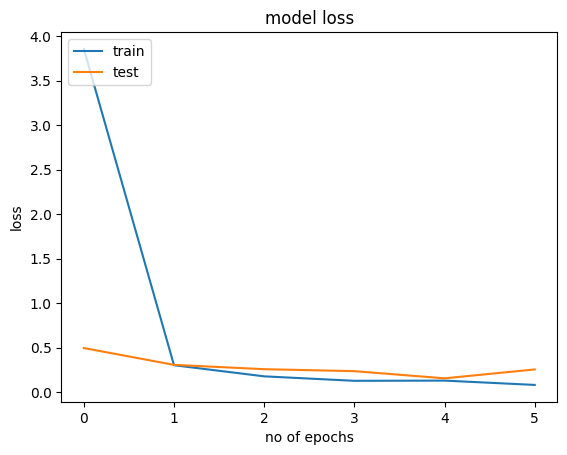

In [35]:
#Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

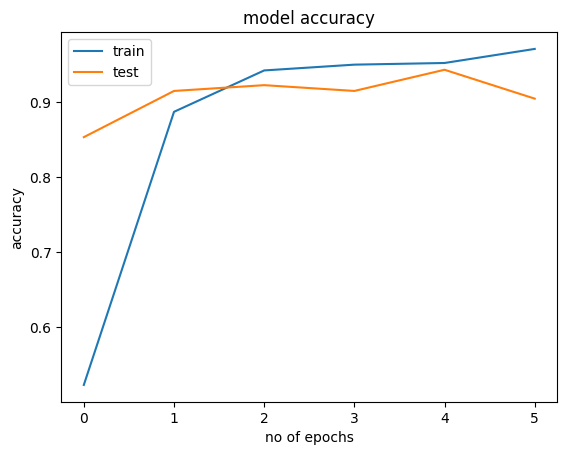

In [36]:
#Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [37]:
#Das Modell speichern
model.save('models/transfer_vgg16.h5')

In [38]:
#Das gespeicherte Modell laden

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

model = load_model("models/transfer_vgg16.h5")

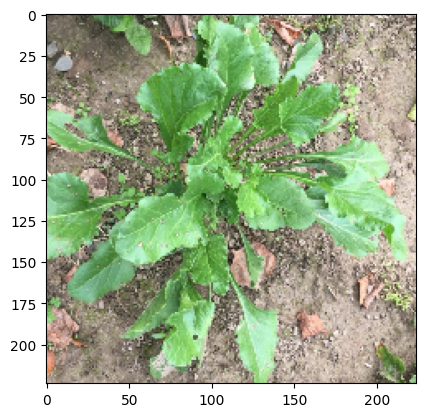

In [40]:
#Ein Bild zur Vorhersage laden
img = load_img('../Data/test/zuckerruebe/5.png', target_size=(224,224))
plt.imshow(img)
plt.show()

In [41]:
#Input vorbereiten

#Umwandeln to array
img = img_to_array(img)

# reshape in ein einzelnes Sample mit 3 Kanälen
img = img.reshape(1, 224, 224, 3)

In [42]:
#Vorhersagewahrscheinlichkeit
result = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [43]:
#klassen labels
class_labels = {'distel': 0, 'kamille': 1, 'nachtchatten': 2, 'zuckerruebe': 3}

In [44]:
#Print Vorhersagewahrscheinlichkeit
print(result)

[[0. 0. 0. 1.]]


In [45]:
#Vorhersage erstellen
print("The prediction is :")
print([key for key in class_labels][np.argmax(result)])


The prediction is :
zuckerruebe
